In [96]:
import psycopg2
from pprint import pprint
import pandas.io.sql as sqlio
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

In [97]:
# Connect to an existing database
conn = psycopg2.connect("dbname=postgres user=sejaldua")

In [98]:
# Open a cursor to perform database operations
cur = conn.cursor()

# Query the database and obtain data as Python objects
cur.execute("SELECT * FROM olympics;")
cur.fetchone()

(1,
 'A Dijiang',
 'M',
 '24',
 '180',
 '80',
 'China',
 'CHN',
 '1992 Summer',
 1992,
 'Summer',
 'Barcelona',
 'Basketball',
 "Basketball Men's Basketball",
 'NA')

In [99]:
# preview the dataset
sql = "SELECT * FROM olympics"
master_df = sqlio.read_sql_query(sql, conn)
master_df

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
0,1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NA
1,2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NA
2,3,Gunnar Nielsen Aaby,M,24,NA,NA,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NA
3,4,Edgar Lindenau Aabye,M,34,NA,NA,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29,179,89,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NA
271112,135570,Piotr ya,M,27,176,59,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NA
271113,135570,Piotr ya,M,27,176,59,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NA
271114,135571,Tomasz Ireneusz ya,M,30,185,96,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NA


In [29]:
# How many teams are there?
sql = """
SELECT COUNT(DISTINCT noc) FROM olympics
"""
sqlio.read_sql_query(sql, conn)

,count
0,230


In [30]:
# How many sports are there?
sql = """
SELECT COUNT(DISTINCT sport) FROM olympics
"""
sqlio.read_sql_query(sql, conn)

,count
0,66


In [176]:
# How many events are there?
sql = """
SELECT COUNT(DISTINCT event) FROM olympics
"""
sqlio.read_sql_query(sql, conn)

,count
0,765


In [35]:
# Who are the top 5 youngest athletes to ever compete in the Games
sql = """
SELECT DISTINCT name, CAST(age AS INTEGER), sport, event,noc, games, city, medal FROM olympics
WHERE age <> 'NA'
ORDER BY age
LIMIT 5
"""
sqlio.read_sql_query(sql, conn)

,name,age,sport,event,noc,games,city,medal
0,Dimitrios Loundras,10,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",GRE,1896 Summer,Athina,Bronze
1,Beatrice Hutiu,11,Figure Skating,Figure Skating Women's Singles,ROU,1968 Winter,Grenoble,NA
2,Carlos Bienvenido Front Barrera,11,Rowing,Rowing Men's Coxed Eights,ESP,1992 Summer,Barcelona,NA
3,Etsuko Inada,11,Figure Skating,Figure Skating Women's Singles,JPN,1936 Winter,Garmisch-Partenkirchen,NA
4,Liana Vicens,11,Swimming,Swimming Women's 100 metres Breaststroke,PUR,1968 Summer,Mexico City,NA


In [40]:
# Who are the top 5 oldest athletes to ever compete in the Games
sql = """
SELECT DISTINCT name, CAST(age AS INTEGER), sport, event,noc, games, city, medal FROM olympics
WHERE age <> 'NA'
ORDER BY age DESC
LIMIT 5
"""
sqlio.read_sql_query(sql, conn)

,name,age,sport,event,noc,games,city,medal
0,John Quincy Adams Ward,97,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",USA,1928 Summer,Amsterdam,NA
1,Winslow Homer,96,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",USA,1932 Summer,Los Angeles,NA
2,Thomas Cowperthwait Eakins,88,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",USA,1932 Summer,Los Angeles,NA
3,George Denholm Armour,84,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",GBR,1948 Summer,London,NA
4,Louis Tauzin,81,Art Competitions,Art Competitions Mixed Sculpturing,FRA,1924 Summer,Paris,NA


In [45]:
# Who are the top 5 oldest athletes to ever compete in the Games, excluding 'Art Competitions'
sql = """
SELECT DISTINCT name, CAST(age AS INTEGER), sport, noc, games, city FROM olympics
WHERE age <> 'NA' AND sport IN (SELECT DISTINCT sport FROM olympics WHERE year = 2016)
ORDER BY age DESC
LIMIT 5
"""
sqlio.read_sql_query(sql, conn)

,name,age,sport,noc,games,city
0,Arthur von Pongracz de Szent-Mikls und vr,72,Equestrianism,AUT,1936 Summer,Berlin
1,Oscar Gomer Swahn,72,Shooting,SWE,1920 Summer,Antwerpen
2,Charles William Martin,71,Sailing,FRA,1900 Summer,Paris
3,Hiroshi Hoketsu,71,Equestrianism,JPN,2012 Summer,London
4,Thomas Foster Scott,71,Archery,USA,1904 Summer,St. Louis


In [53]:
# Who are the top 5 heaviest athletes to ever compete in the Games
sql = """
SELECT DISTINCT name, CAST(weight AS DECIMAL), sport, event, noc, games, city, medal FROM olympics
WHERE weight <> 'NA'
ORDER BY weight DESC
LIMIT 5
"""
sqlio.read_sql_query(sql, conn)

,name,weight,sport,event,noc,games,city,medal
0,"Ricardo Blas, Jr.",214.0,Judo,Judo Men's Heavyweight,GUM,2008 Summer,Beijing,NA
1,"Ricardo Blas, Jr.",214.0,Judo,Judo Men's Heavyweight,GUM,2012 Summer,London,NA
2,Aytami Ruano Vega,198.0,Judo,Judo Men's Heavyweight,ESP,2004 Summer,Athina,NA
3,Marek Galiski,190.0,Wrestling,"Wrestling Men's Super-Heavyweight, Greco-Roman",POL,1980 Summer,Moskva,NA
4,"Christopher J. ""Chris"" Taylor",182.0,Wrestling,"Wrestling Men's Super-Heavyweight, Freestyle",USA,1972 Summer,Munich,Bronze


In [82]:
sql = """
SELECT year, region AS gold FROM olympics
LEFT JOIN noc_regions
ON olympics.noc = noc_regions.noc
WHERE sport = 'Basketball' and sex = 'F' and medal = 'Gold'
GROUP BY year, region
ORDER BY year DESC
"""
sqlio.read_sql_query(sql, conn)

,year,gold
0,2016,USA
1,2012,USA
2,2008,USA
3,2004,USA
4,2000,USA
5,1996,USA
6,1992,Russia
7,1988,USA
8,1984,USA
9,1980,Russia


In [79]:
sql = """
SELECT G.year, G.gold, S.silver FROM 
(SELECT year, region AS gold FROM olympics
LEFT JOIN noc_regions
ON olympics.noc = noc_regions.noc
WHERE sport = 'Basketball' and sex = 'F' and medal = 'Gold'
GROUP BY year, region) G,
(SELECT year, region AS silver FROM olympics
LEFT JOIN noc_regions
ON olympics.noc = noc_regions.noc
WHERE sport = 'Basketball' and sex = 'F' and medal = 'Silver'
GROUP BY year, region) S
WHERE G.year = S.year
ORDER BY year DESC
"""
sqlio.read_sql_query(sql, conn)

,year,gold,silver
0,2016,USA,Spain
1,2012,USA,France
2,2008,USA,Australia
3,2004,USA,Australia
4,2000,USA,Australia
5,1996,USA,Brazil
6,1992,Russia,China
7,1988,USA,Serbia
8,1984,USA,South Korea
9,1980,Russia,Bulgaria


Sheesh. USA Women's Basketball team has not had a taste of defeat since 1992. That is 6 straight Gold medals!

In [6]:
sql = """
SELECT name, COUNT(*) FROM olympics
WHERE sport = 'Basketball' and sex = 'F' and medal = 'Gold' and noc = 'USA'
GROUP BY name
HAVING COUNT(*) >= 3
ORDER BY count DESC
"""
df = sqlio.read_sql_query(sql, conn)
df

,name,count
0,Lisa Deshawn Leslie (-Lockwood),4
1,"Suzanne Brigit ""Sue"" Bird",4
2,Diana Lurena Taurasi,4
3,Tamika Devonne Catchings,4
4,Teresa Edwards,4
5,Sheryl Denice Swoopes,3
6,"Katherine May ""Katie"" Smith",3
7,Seimone Delicia Augustus,3
8,Dawn Michelle Staley,3
9,Sylvia Shaqueria Fowles,3


These queens have showed up 3+ times, bringing home the Gold and making Team USA proud!

In [81]:
sql = """
SELECT G.year, G.gold, S.silver FROM 
(SELECT year, region AS gold FROM olympics
LEFT JOIN noc_regions
ON olympics.noc = noc_regions.noc
WHERE sport = 'Basketball' and sex = 'M' and medal = 'Gold'
GROUP BY year, region) G,
(SELECT year, region AS silver FROM olympics
LEFT JOIN noc_regions
ON olympics.noc = noc_regions.noc
WHERE sport = 'Basketball' and sex = 'M' and medal = 'Silver'
GROUP BY year, region) S
WHERE G.year = S.year
ORDER BY year DESC
LIMIT 8
"""
sqlio.read_sql_query(sql, conn)

,year,gold,silver
0,2016,USA,Serbia
1,2012,USA,Spain
2,2008,USA,Spain
3,2004,Argentina,Italy
4,2000,USA,France
5,1996,USA,Serbia
6,1992,USA,Croatia
7,1988,Russia,Serbia


### Number of Athletes Competing over Time

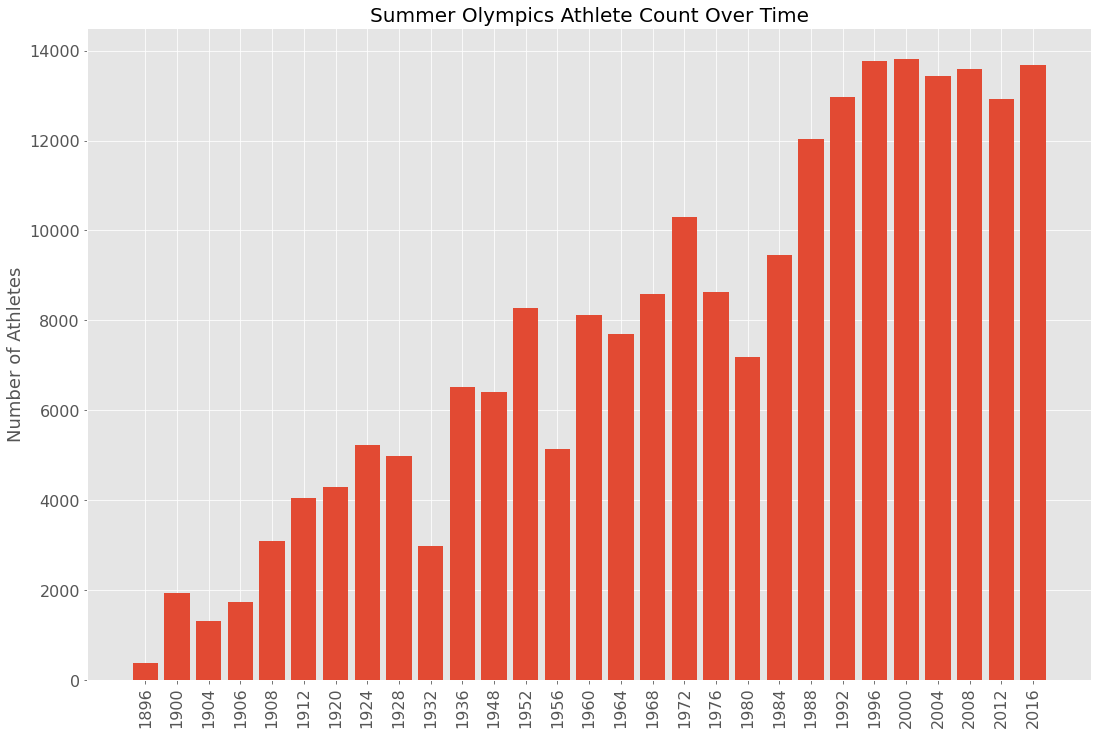

In [155]:
sql = """
SELECT year, COUNT(*) AS num_athletes FROM olympics
WHERE season = 'Summer'
GROUP BY year
"""
df = sqlio.read_sql_query(sql, conn)
# df
fig = plt.figure(figsize=(18,12))
plt.bar(df['year'].astype(str), df['num_athletes'])
plt.title('Summer Olympics Athlete Count Over Time', fontsize=20)
plt.xticks(rotation=90, fontsize=16);
plt.yticks(fontsize=16);
plt.ylabel('Number of Athletes', fontsize=18)
fig.savefig("./figures/num_athletes_over_time.png")

### Number of Athletes per Sport

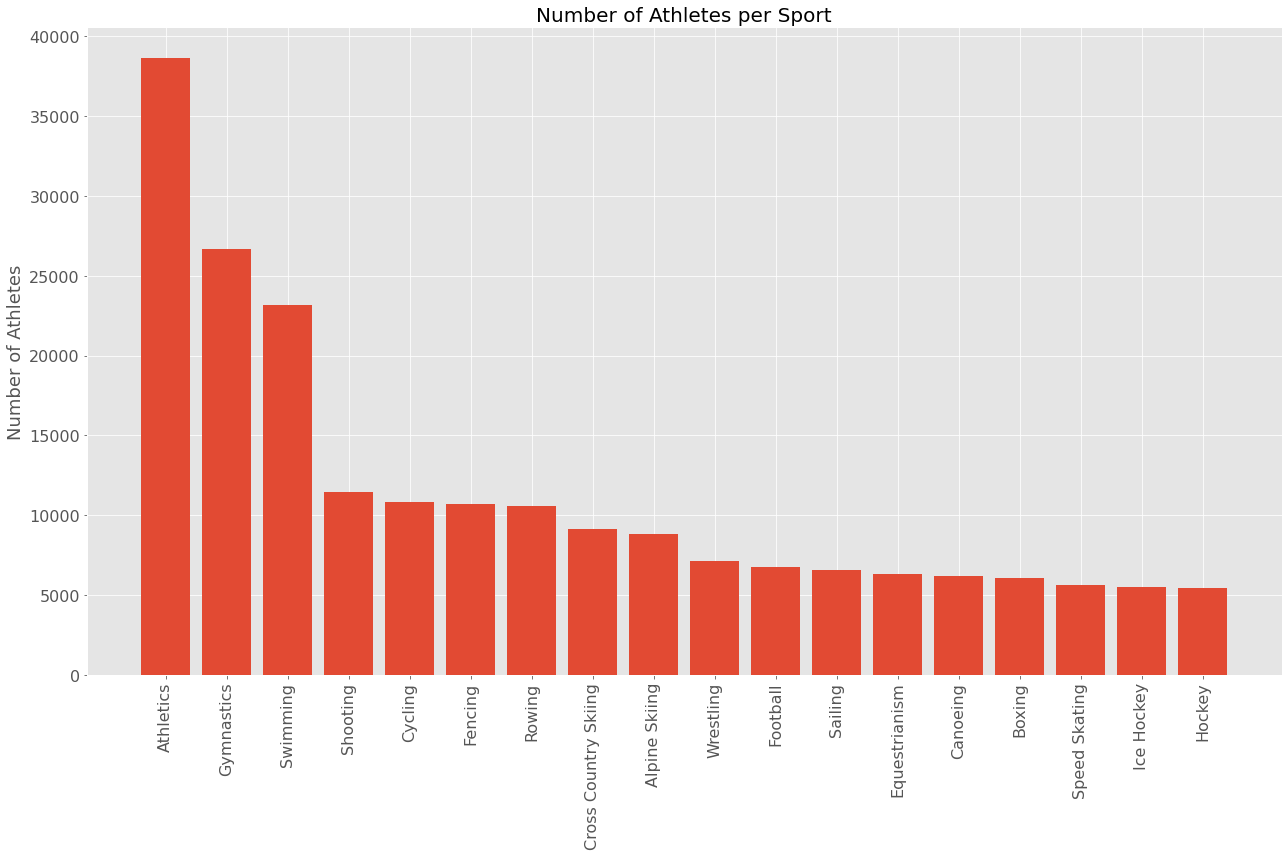

In [157]:
sql = """
SELECT sport, COUNT(*) AS num_athletes FROM olympics
GROUP BY sport
HAVING COUNT(*) > 5000
ORDER BY COUNT(*) DESC
"""
df = sqlio.read_sql_query(sql, conn)
fig = plt.figure(figsize=(18,12))
plt.bar(df['sport'], df['num_athletes'])
plt.ylabel('Number of Athletes', fontsize=18)
plt.title('Number of Athletes per Sport', fontsize=20)
plt.xticks(rotation=90, fontsize=16);
plt.yticks(fontsize=16);
plt.tight_layout();
fig.savefig("./figures/num_athletes_per_sport.png")


### Number of Athletes per Region

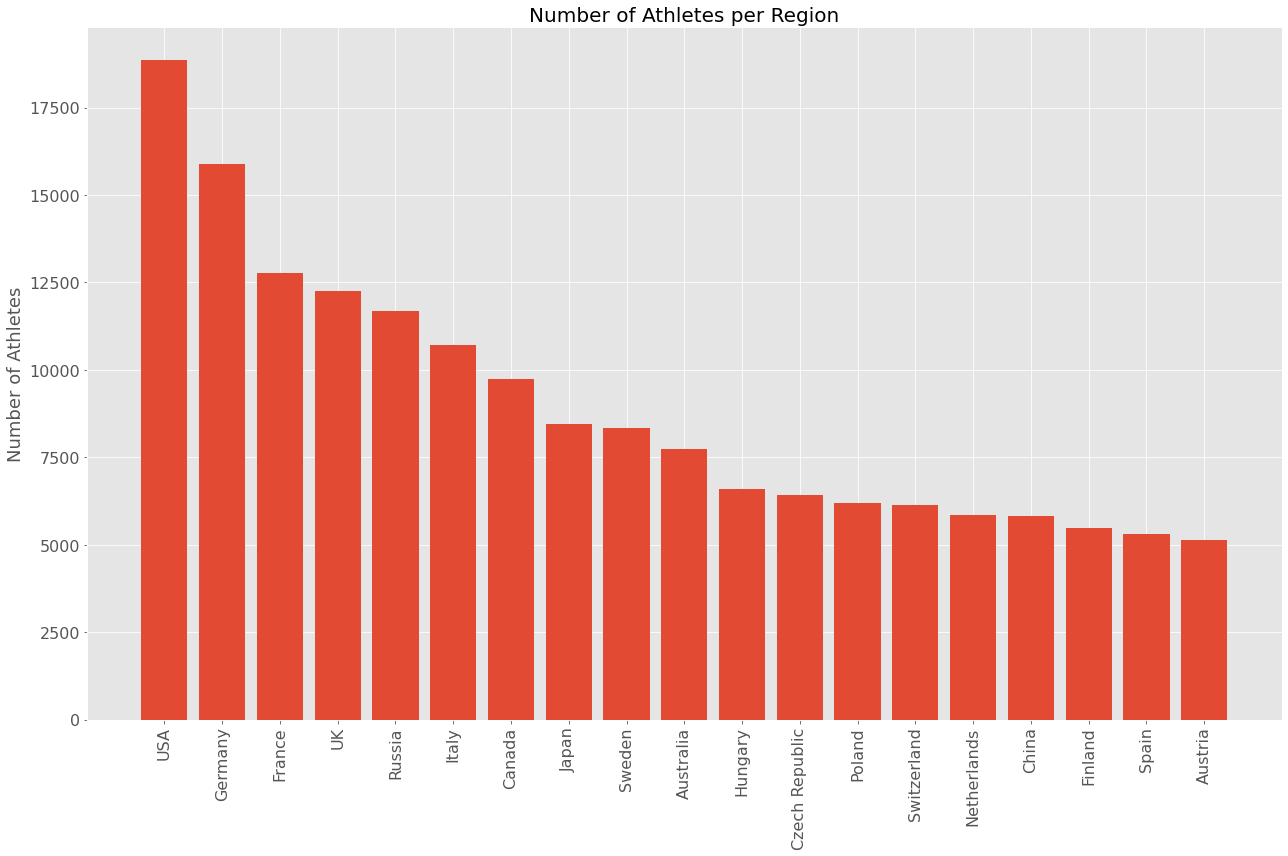

In [95]:
sql = """
SELECT region, COUNT(*) AS num_athletes FROM olympics
LEFT JOIN noc_regions
ON noc_regions.noc = olympics.noc
GROUP BY region
HAVING COUNT(*) > 5000
ORDER BY COUNT(*) DESC
"""
df = sqlio.read_sql_query(sql, conn)
fig = plt.figure(figsize=(18,12))
plt.bar(df['region'][:20], df['num_athletes'][:20])
plt.ylabel('Number of Athletes', fontsize=18)
plt.title('Number of Athletes per Region', fontsize=20)
plt.xticks(rotation=90, fontsize=16);
plt.yticks(fontsize=16);
plt.tight_layout();
fig.savefig("./figures/num_athletes_per_region.png")

### Number of Events per Sport

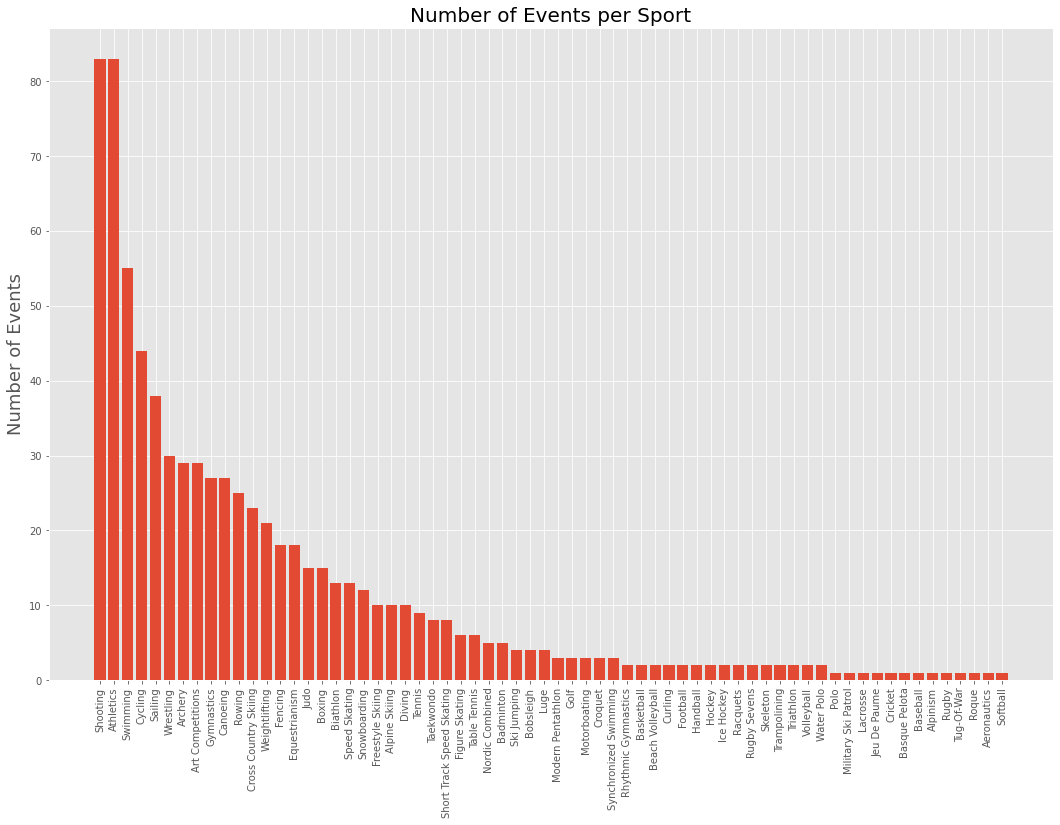

In [28]:
sql = """
SELECT sport, COUNT(DISTINCT event) FROM olympics
GROUP BY sport
ORDER BY COUNT(DISTINCT event) DESC
"""
df = sqlio.read_sql_query(sql, conn)
# df
fig = plt.figure(figsize=(18,12))
plt.bar(df['sport'], df['count'])
plt.ylabel('Number of Events', fontsize=18)
plt.title('Number of Events per Sport', fontsize=20)
plt.xticks(rotation=90);
fig.savefig("./figures/num_events_per_sport.png")

### Analyzing Athletic Build (Height and Weight) by Sport

In [16]:
# most popular sports by number of athletes
sql = """
SELECT DISTINCT sport FROM olympics
WHERE year >= 2014
"""
pop_sports = list(sqlio.read_sql_query(sql, conn)['sport'])

In [17]:
# shortest gymnasts
sql = """
SELECT DISTINCT name, CAST(height AS INTEGER), CAST(weight AS DECIMAL), region FROM olympics
LEFT OUTER JOIN noc_regions
ON olympics.noc = noc_regions.noc
WHERE sport = 'Gymnastics' AND sex = 'F' AND height <> 'NA' AND weight <> 'NA'
ORDER BY height
LIMIT 10
"""
df = sqlio.read_sql_query(sql, conn)
df

,name,height,weight,region
0,Rosario Briones,127,42.0,Mexico
1,Ana Olvido Manso Gallego,132,31.0,Spain
2,Flvia Lopes Saraiva,133,31.0,Brazil
3,Choi Myong-Hui,135,25.0,North Korea
4,Jana Labkov (-Valachov),135,34.0,Czech Republic
5,Crystal Gilmore,136,47.0,Canada
6,Liubov Sheremeta,136,30.0,Ukraine
7,Lu Li,136,30.0,China
8,Mariya Yevgenyevna Filatova (-Kurbatova),136,30.0,Russia
9,Claudia Fragapane,137,43.0,UK


In [18]:
# tallest gymnasts
sql = """
SELECT DISTINCT name, CAST(height AS INTEGER), CAST(weight AS DECIMAL), region FROM olympics
LEFT OUTER JOIN noc_regions
ON olympics.noc = noc_regions.noc
WHERE sport = 'Gymnastics' AND sex = 'F' AND height <> 'NA' AND weight <> 'NA'
ORDER BY height DESC
LIMIT 10
"""
df = sqlio.read_sql_query(sql, conn)
df

,name,height,weight,region
0,Arja Vellamo Lehtinen (-Paatsalo),179,62.0,Finland
1,Agata Jadwiga Jaroszek-Karczmarek,178,61.0,Poland
2,Bndicte Evrard,176,38.0,Belgium
3,Fan Ye,176,72.0,China
4,"Sandra Marlene Ruddick (Anderson-, -John)",176,59.0,USA
5,Katarna arisk (-Mulders),174,44.0,Czech Republic
6,Christine Schmitt (-Dressel),172,54.0,Germany
7,Salme Kaarina Koskinen (-Paimander),172,56.0,Finland
8,Marie-Sophie Hindermann,171,51.0,Germany
9,Ute Starke (-Kahlenberg),171,49.0,Germany


In [158]:
sql = """
SELECT sport, MIN(CAST(height AS INTEGER)), ROUND(AVG(CAST(height AS INTEGER)), 2) AS avg, MAX(CAST(height AS INTEGER))
FROM olympics
WHERE sex = 'F' AND height <> 'NA' AND weight <> 'NA' AND sport IN (
    SELECT sport FROM olympics
    GROUP BY sport
    HAVING COUNT(*) > 3000
)
GROUP BY sport
ORDER BY avg
"""
female_body_df = sqlio.read_sql_query(sql, conn)
female_body_df

,sport,min,avg,max
0,Gymnastics,127,156.16,179
1,Weightlifting,141,160.47,190
2,Wrestling,147,163.87,180
3,Shooting,146,164.93,190
4,Judo,143,166.21,193
5,Hockey,138,166.21,190
6,Biathlon,150,166.55,182
7,Cross Country Skiing,150,166.68,184
8,Alpine Skiing,152,167.23,187
9,Speed Skating,149,167.43,185


In [159]:
sql = """
SELECT sport, MIN(CAST(height AS INTEGER)), ROUND(AVG(CAST(height AS INTEGER)), 2) AS avg, MAX(CAST(height AS INTEGER))
FROM olympics
WHERE sex = 'M' AND height <> 'NA' AND weight <> 'NA' AND sport IN (
    SELECT sport FROM olympics
    GROUP BY sport
    HAVING COUNT(*) > 3000
)
GROUP BY sport
ORDER BY avg
"""
male_body_df = sqlio.read_sql_query(sql, conn)
male_body_df

,sport,min,avg,max
0,Gymnastics,150,167.61,188
1,Weightlifting,140,169.15,205
2,Art Competitions,150,172.82,188
3,Boxing,127,172.84,208
4,Wrestling,137,172.91,214
5,Shooting,132,176.07,213
6,Equestrianism,154,176.61,197
7,Hockey,150,176.86,200
8,Judo,145,177.48,213
9,Football,140,177.52,200


In [178]:
sql = """
SELECT F.sport, F.min AS F_min, F.avg AS F_avg, F.max AS F_max, M.min AS M_min, M.avg AS M_avg, M.max AS M_max, (F.avg + M.avg) AS avg_sum FROM
    (
        SELECT sport, MIN(CAST(height AS INTEGER)), ROUND(AVG(CAST(height AS INTEGER)), 2) AS avg, MAX(CAST(height AS INTEGER))
        FROM olympics
        WHERE sex = 'F' AND height <> 'NA' AND weight <> 'NA' AND sport IN (
            SELECT sport FROM olympics
            GROUP BY sport
            HAVING COUNT(*) > 2000
    )
    GROUP BY sport
    ORDER BY avg) F,
    (
        SELECT sport, MIN(CAST(height AS INTEGER)), ROUND(AVG(CAST(height AS INTEGER)), 2) AS avg, MAX(CAST(height AS INTEGER))
        FROM olympics
        WHERE sex = 'M' AND height <> 'NA' AND weight <> 'NA' AND sport IN (
            SELECT sport FROM olympics
            GROUP BY sport
            HAVING COUNT(*) > 2000
    )
    GROUP BY sport
    ORDER BY avg) M
WHERE F.sport = M.sport
ORDER BY avg_sum;
"""
df = sqlio.read_sql_query(sql, conn)
df

,sport,f_min,f_avg,f_max,m_min,m_avg,m_max,avg_sum
0,Gymnastics,127,156.16,179,150,167.61,188,323.77
1,Weightlifting,141,160.47,190,140,169.15,205,329.62
2,Diving,137,161.28,178,148,171.65,188,332.93
3,Figure Skating,137,160.55,180,156,176.04,193,336.59
4,Wrestling,147,163.87,180,137,172.91,214,336.78
5,Ski Jumping,152,164.31,175,156,176.65,200,340.96
6,Shooting,146,164.93,190,132,176.07,213,341.00
7,Boxing,150,168.68,184,127,172.84,208,341.52
8,Hockey,138,166.21,190,150,176.86,200,343.07
9,Judo,143,166.21,193,145,177.48,213,343.69


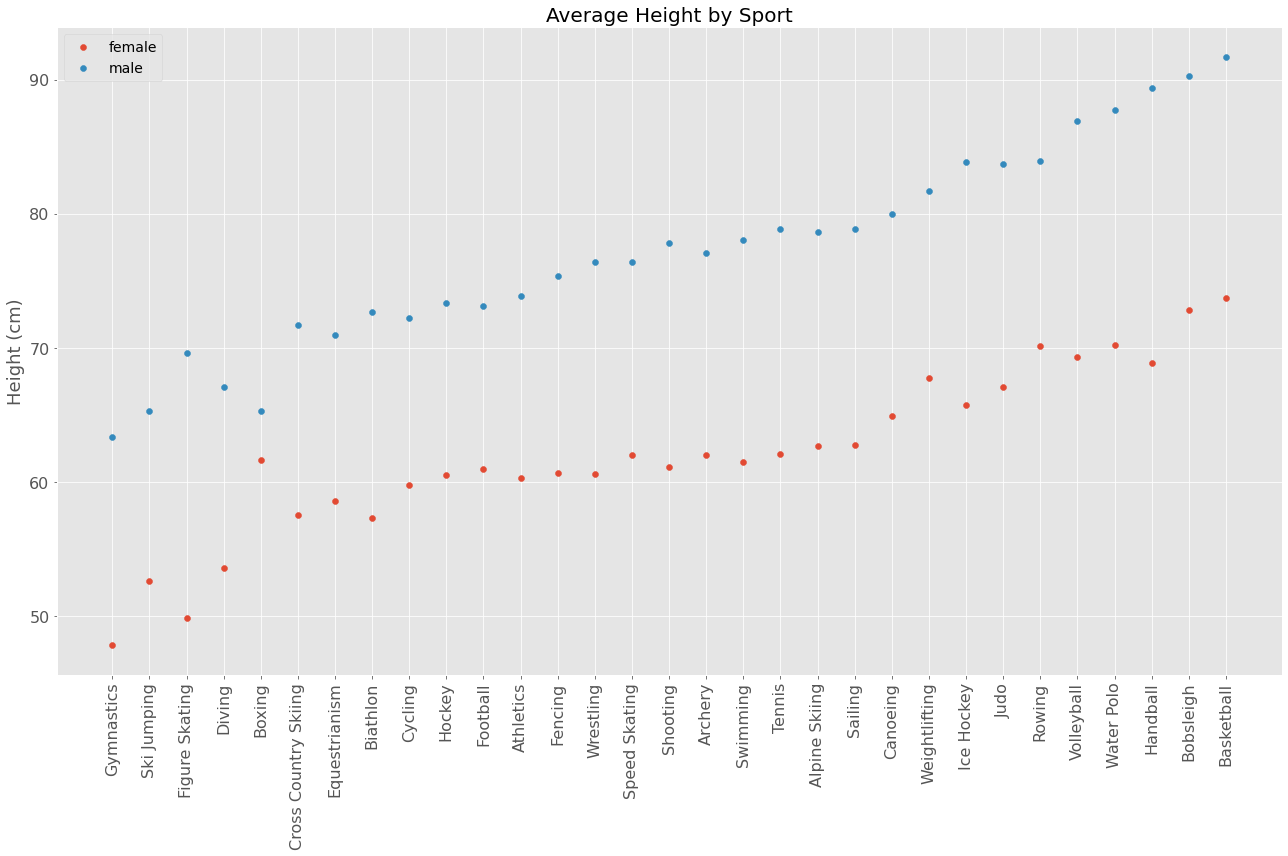

In [181]:
fig = plt.figure(figsize=(18,12))
plt.scatter(df['sport'], df['f_avg'], label='female')
plt.scatter(df['sport'], df['m_avg'], label='male')
plt.xticks(rotation=90, fontsize=16);
plt.yticks(fontsize=16)
plt.ylabel('Height (cm)', fontsize=18);
plt.title('Average Height by Sport', fontsize=20)
plt.legend(fontsize=14)
plt.tight_layout()
fig.savefig('./figures/avg_height_by_sport.png')

In [182]:
sql = """
SELECT F.sport, F.min AS F_min, F.avg AS F_avg, F.max AS F_max, M.min AS M_min, M.avg AS M_avg, M.max AS M_max, (F.avg + M.avg) AS avg_sum FROM
    (
        SELECT sport, MIN(CAST(weight AS DECIMAL)), ROUND(AVG(CAST(weight AS DECIMAL)), 2) AS avg, MAX(CAST(weight AS DECIMAL))
        FROM olympics
        WHERE sex = 'F' AND height <> 'NA' AND weight <> 'NA' AND sport IN (
            SELECT sport FROM olympics
            GROUP BY sport
            HAVING COUNT(*) > 2000
    )
    GROUP BY sport
    ORDER BY avg) F,
    (
        SELECT sport, MIN(CAST(weight AS DECIMAL)), ROUND(AVG(CAST(weight AS DECIMAL)), 2) AS avg, MAX(CAST(weight AS DECIMAL))
        FROM olympics
        WHERE sex = 'M' AND height <> 'NA' AND weight <> 'NA' AND sport IN (
            SELECT sport FROM olympics
            GROUP BY sport
            HAVING COUNT(*) > 2000
    )
    GROUP BY sport
    ORDER BY avg) M
WHERE F.sport = M.sport
ORDER BY avg_sum;
"""
df = sqlio.read_sql_query(sql, conn)
df

,sport,f_min,f_avg,f_max,m_min,m_avg,m_max,avg_sum
0,Gymnastics,25.0,47.79,72.0,46.0,63.34,102.0,111.13
1,Ski Jumping,43.0,52.62,62.0,50.0,65.25,85.0,117.87
2,Figure Skating,32.0,49.86,68.0,47.0,69.59,90.0,119.45
3,Diving,28.0,53.57,75.0,37.0,67.07,91.0,120.64
4,Boxing,50.0,61.64,79.0,46.0,65.29,140.0,126.93
5,Cross Country Skiing,42.0,57.49,77.0,53.0,71.70,100.0,129.19
6,Equestrianism,43.0,58.60,85.0,50.0,70.92,100.0,129.52
7,Biathlon,45.0,57.31,72.0,51.0,72.63,95.0,129.94
8,Cycling,45.0,59.77,92.0,48.0,72.19,104.0,131.96
9,Hockey,45.0,60.53,80.0,48.0,73.34,105.0,133.87


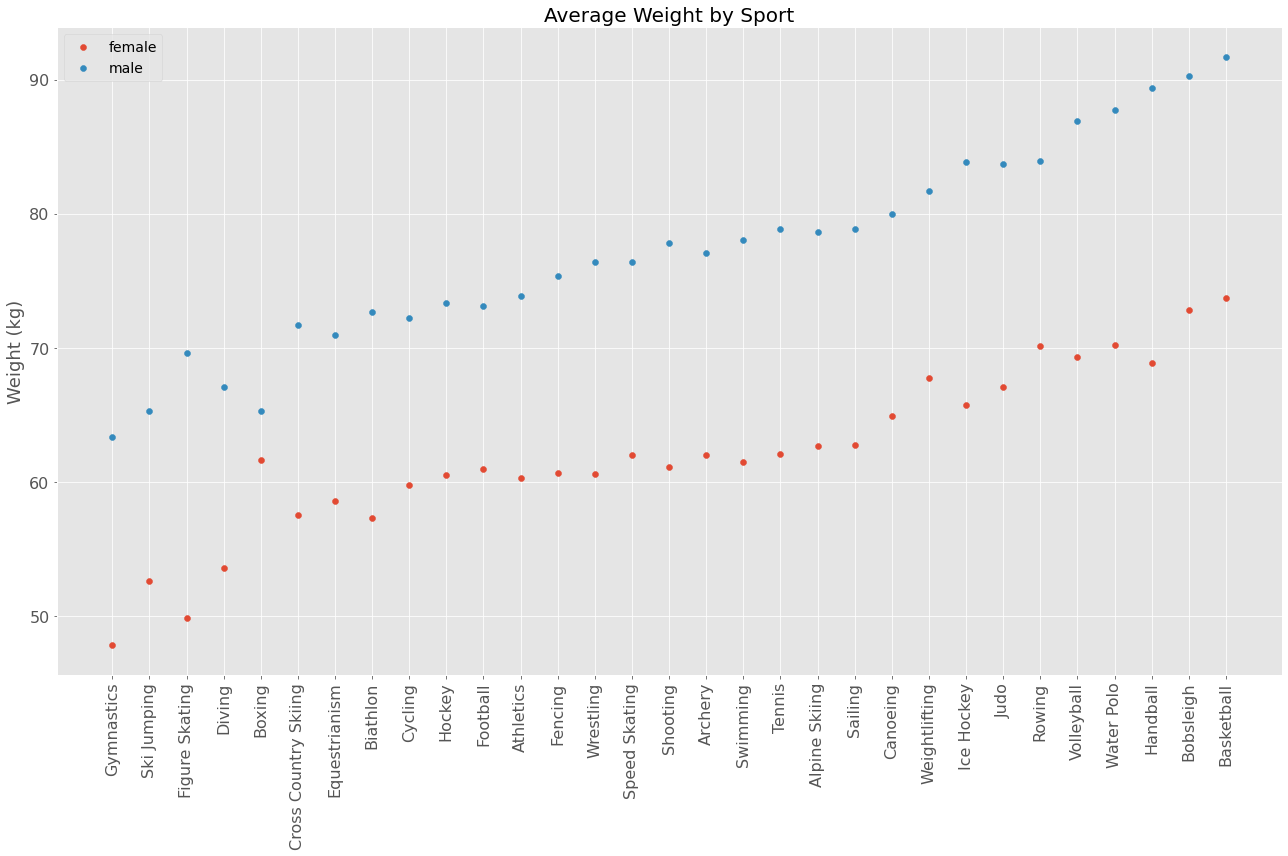

In [183]:
fig = plt.figure(figsize=(18,12))
plt.scatter(df['sport'], df['f_avg'], label='female')
plt.scatter(df['sport'], df['m_avg'], label='male')
plt.xticks(rotation=90, fontsize=16);
plt.yticks(fontsize=16)
plt.ylabel('Weight (kg)', fontsize=18);
plt.title('Average Weight by Sport', fontsize=20)
plt.legend(fontsize=14)
plt.tight_layout()
fig.savefig('./figures/avg_weight_by_sport.png')

<AxesSubplot:xlabel='year'>

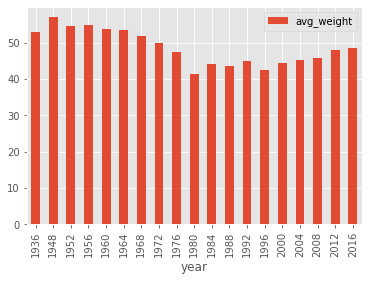

In [157]:
# WEIGHT STATS by Year
sql = """
SELECT year, ROUND(AVG(CAST(weight AS DECIMAL)), 2) AS avg_weight
FROM olympics
WHERE sport = 'Gymnastics' AND sex = 'F' AND weight <> 'NA'
GROUP BY year;
"""
df = sqlio.read_sql_query(sql, conn)
df.plot('year', 'avg_weight', kind='bar')

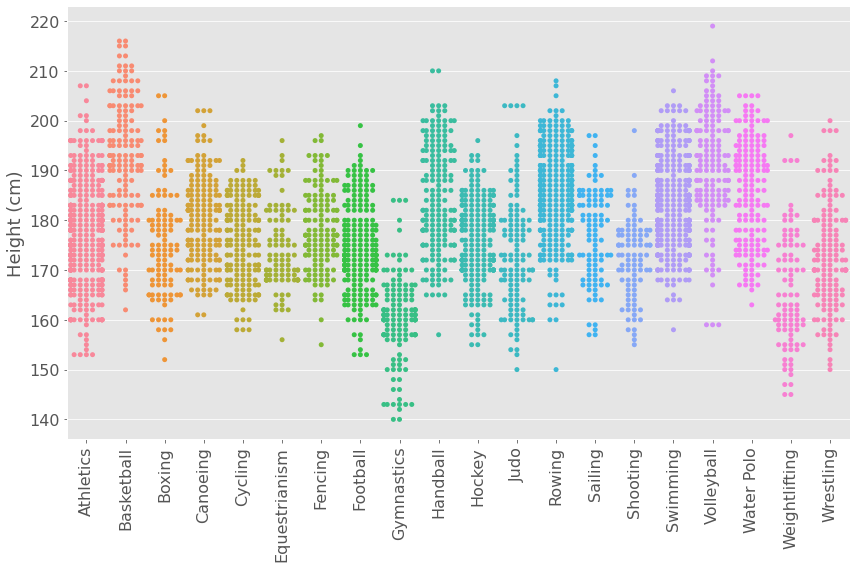

In [138]:
sql = """
SELECT sport, CAST(height AS INTEGER) FROM olympics
WHERE sport IN (
    SELECT sport FROM olympics
    GROUP BY sport
    HAVING COUNT(*) > 3000
) AND height <> 'NA' AND season = 'Summer' and year >= 2012 AND medal <> 'NA'
ORDER BY sport
"""
df = sqlio.read_sql_query(sql, conn)
df
fig, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation=90, fontsize=16);
plt.yticks(fontsize=16);
sns.swarmplot(data=df, x='sport', y='height')
plt.ylabel('Height (cm)', fontsize=18);
plt.xlabel('')
plt.tight_layout()
fig.savefig('./figures/height_swarmplot.png')

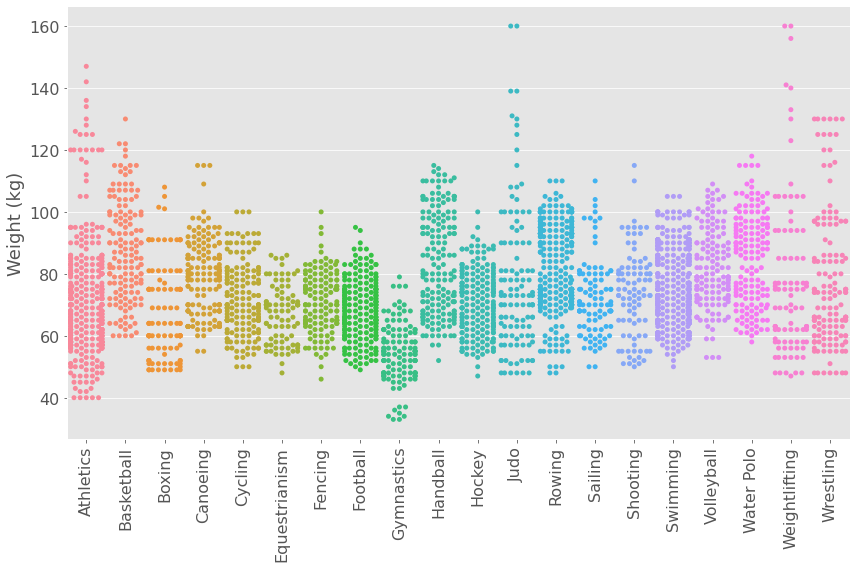

In [139]:
sql = """
SELECT sport, CAST(weight AS DECIMAL) FROM olympics
WHERE sport IN (
    SELECT sport FROM olympics
    GROUP BY sport
    HAVING COUNT(*) > 3000
) AND weight <> 'NA' AND season = 'Summer' and year >= 2012 AND medal <> 'NA'
ORDER BY sport
"""
df = sqlio.read_sql_query(sql, conn)
df
fig, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation=90, fontsize=16);
plt.yticks(fontsize=16);
sns.swarmplot(data=df, x='sport', y='weight')
plt.ylabel('Weight (kg)', fontsize=18);
plt.xlabel('')
plt.tight_layout()
fig.savefig('./figures/weight_swarmplot.png')

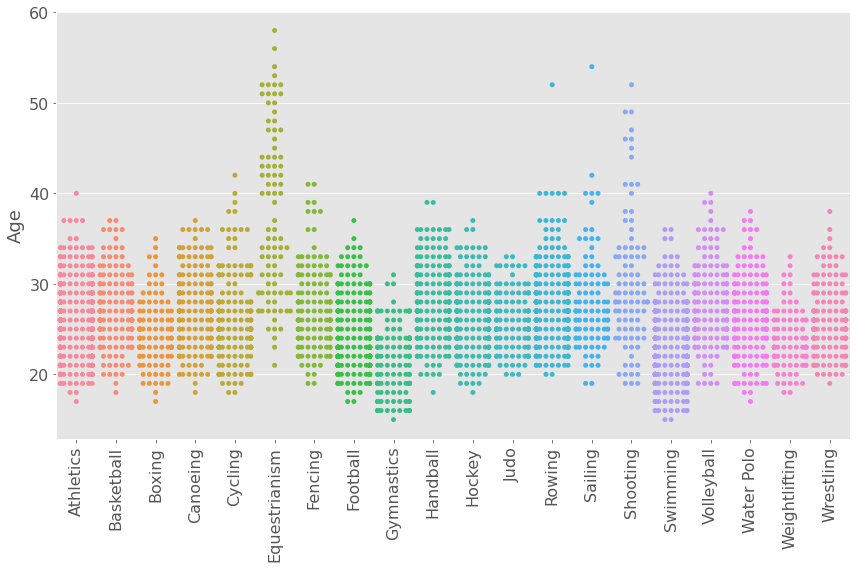

In [140]:
sql = """
SELECT sport, CAST(age AS INTEGER) FROM olympics
WHERE sport IN (
    SELECT sport FROM olympics
    GROUP BY sport
    HAVING COUNT(*) > 3000
) AND age <> 'NA' AND season = 'Summer' and year >= 2012 AND medal <> 'NA'
ORDER BY sport
"""
df = sqlio.read_sql_query(sql, conn)
df
fig, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation=90, fontsize=16);
plt.yticks(fontsize=16);
sns.swarmplot(data=df, x='sport', y='age')
plt.ylabel('Age', fontsize=18);
plt.xlabel('')
plt.tight_layout()
fig.savefig('./figures/age_swarmplot.png')

<AxesSubplot:xlabel='height', ylabel='weight'>

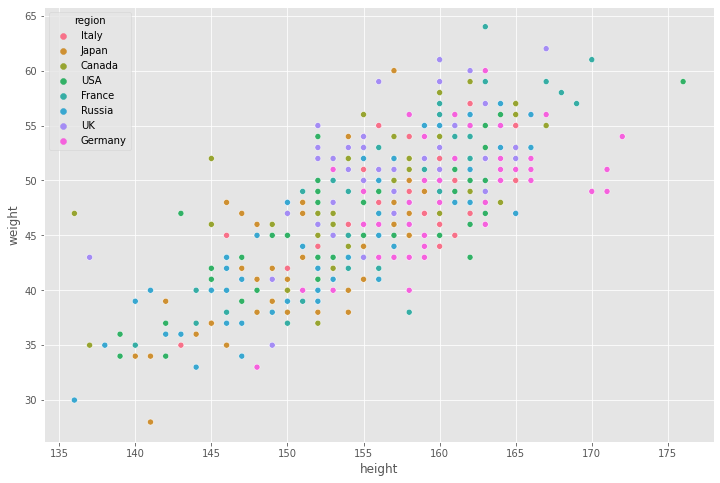

In [80]:
sql = """
SELECT DISTINCT name, CAST(height AS INTEGER), CAST(weight AS DECIMAL), region
FROM olympics
LEFT JOIN noc_regions
ON olympics.noc = noc_regions.noc
WHERE sport = 'Gymnastics' AND sex = 'F' AND height <> 'NA' AND weight <> 'NA' 
AND region IN
(SELECT region FROM olympics
LEFT JOIN noc_regions
ON olympics.noc = noc_regions.noc
GROUP BY region
ORDER BY COUNT(DISTINCT name) DESC
LIMIT 8)
"""
df = sqlio.read_sql_query(sql, conn)
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data=df, x='height', y='weight', hue='region')
# plt.show()
# df.plot('height', 'weight', kind='scatter', figsize=(10,6))

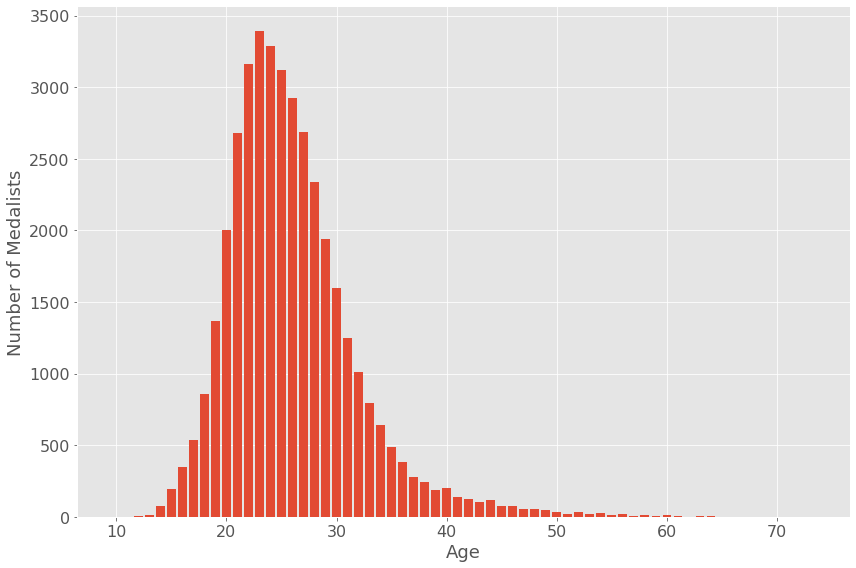

In [153]:
# Age Distribution of Olympic Medalists
# sql = """
# SELECT age, SUM(CASE medal
#             WHEN 'Gold' THEN 1
#             WHEN 'Silver' THEN 1
#             WHEN 'Bronze' THEN 1
#             ELSE 0
#             END) AS num_gold
# FROM olympics
# WHERE age <> 'NA'
# GROUP BY age
# HAVING SUM(CASE medal
#             WHEN 'Gold' THEN 1
#             WHEN 'Silver' THEN 1
#             WHEN 'Bronze' THEN 1
#             ELSE 0
#             END) > 3
# """
sql = """
SELECT CAST(age AS INTEGER), COUNT(*) AS num_medalists
FROM olympics
WHERE age <> 'NA' AND medal <> 'NA'
GROUP BY age
"""
df = sqlio.read_sql_query(sql, conn)
fig = plt.figure(figsize=(12,8))
plt.bar(df['age'], df['num_medalists'])
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
plt.xlabel('Age', fontsize=18)
plt.ylabel('Number of Medalists', fontsize=18);
plt.tight_layout()
fig.savefig('./figures/age_distribution_of_medalists.png')

In [184]:
sql = """
SELECT
  name, sex, noc, sport, SUM(CASE medal
             WHEN 'Gold' THEN 3
             WHEN 'Silver' THEN 2
             WHEN 'Bronze' THEN 1
             ELSE 0
             END)
FROM 
  olympics
GROUP BY 
  name, sex, noc, sport
ORDER BY sum DESC
LIMIT 10;
"""
df = sqlio.read_sql_query(sql, conn)
df

,name,sex,noc,sport,sum
0,"Michael Fred Phelps, II",M,USA,Swimming,77
1,Larysa Semenivna Latynina (Diriy-),F,URS,Gymnastics,41
2,Nikolay Yefimovich Andrianov,M,URS,Gymnastics,34
3,Ole Einar Bjrndalen,M,NOR,Biathlon,33
4,Paavo Johannes Nurmi,M,FIN,Athletics,33
5,Sawao Kato,M,JPN,Gymnastics,31
6,Borys Anfiyanovych Shakhlin,M,URS,Gymnastics,31
7,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",F,USA,Swimming,31
8,Edoardo Mangiarotti,M,ITA,Fencing,30
9,"Raymond Clarence ""Ray"" Ewry",M,USA,Athletics,30


In [182]:
sql = """
SELECT
  name, sport, SUM(CASE medal
             WHEN 'Gold' THEN 3
             WHEN 'Silver' THEN 2
             WHEN 'Bronze' THEN 1
             ELSE 0
             END)
FROM 
  olympics
WHERE 
    noc = 'USA'
GROUP BY 
  name, sport
ORDER BY sum DESC
LIMIT 10;
"""
df = sqlio.read_sql_query(sql, conn)
df

,name,sport,sum
0,"Michael Fred Phelps, II",Swimming,77
1,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",Swimming,31
2,Mark Andrew Spitz,Swimming,30
3,"Raymond Clarence ""Ray"" Ewry",Athletics,30
4,"Frederick Carlton ""Carl"" Lewis",Athletics,29
5,"Matthew Nicholas ""Matt"" Biondi",Swimming,29
6,Ryan Steven Lochte,Swimming,27
7,Carl Townsend Osburn,Shooting,25
8,Allyson Michelle Felix,Athletics,24
9,"Dara Grace Torres (-Hoffman, -Minas)",Swimming,24


In [188]:
sql = """
SELECT
  name, noc, sport, COUNT(CASE medal
             WHEN 'Gold' THEN 1
             WHEN 'Silver' THEN 1
             WHEN 'Bronze' THEN 1
             ELSE 0
             END) AS num_medals
FROM 
  olympics
GROUP BY 
  name, noc, sport
ORDER BY num_medals DESC
LIMIT 10;
"""
df = sqlio.read_sql_query(sql, conn)
df

,name,noc,sport,num_medals
0,Robert Tait McKenzie,CAN,Art Competitions,58
1,Heikki Ilmari Savolainen,FIN,Gymnastics,39
2,"Joseph ""Josy"" Stoffel",LUX,Gymnastics,38
3,Ioannis Theofilakis,GRE,Shooting,36
4,Alexandros Theofilakis,GRE,Shooting,32
5,Takashi Ono,JPN,Gymnastics,32
6,Jean Lucien Nicolas Jacoby,LUX,Art Competitions,32
7,Michel Mathiot,FRA,Gymnastics,31
8,"Johann ""Hans"" Sauter",AUT,Gymnastics,31
9,"Alfred August ""Al"" Jochim",USA,Gymnastics,31


In [190]:
sql = """
SELECT
  name, noc, sport, 
             SUM(CASE medal
                WHEN 'Gold' THEN 1
                ELSE 0
                END) AS num_gold,
             SUM(CASE medal
                WHEN 'Silver' THEN 1
                ELSE 0
                END) AS num_silver,
            SUM(CASE medal
             WHEN 'Bronze' THEN 1
             ELSE 0
             END) AS num_bronze
FROM 
  olympics
WHERE sex = 'F'
GROUP BY 
  name, noc, sport
ORDER BY num_gold DESC
LIMIT 10;
"""
df = sqlio.read_sql_query(sql, conn)
df

,name,noc,sport,num_gold,num_silver,num_bronze
0,Larysa Semenivna Latynina (Diriy-),URS,Gymnastics,9,5,4
1,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",USA,Swimming,8,3,1
2,Vra slavsk (-Odloilov),TCH,Gymnastics,7,4,0
3,Lidiya Pavlovna Skoblikova (-Polozkova),URS,Speed Skating,6,0,0
4,Isabelle Regina Werth,GER,Equestrianism,6,4,0
5,Maria Valentina Vezzali,ITA,Fencing,6,1,2
6,Amy Deloris Van Dyken (-Rouen),USA,Swimming,6,0,0
7,Marit Bjrgen,NOR,Cross Country Skiing,6,3,1
8,Allyson Michelle Felix,USA,Athletics,6,3,0
9,Kristin Otto,GDR,Swimming,6,0,0


In [191]:
sql = """
SELECT
  name, noc, sport, 
             SUM(CASE medal
                WHEN 'Gold' THEN 1
                ELSE 0
                END) AS num_gold,
             SUM(CASE medal
                WHEN 'Silver' THEN 1
                ELSE 0
                END) AS num_silver,
            SUM(CASE medal
             WHEN 'Bronze' THEN 1
             ELSE 0
             END) AS num_bronze
FROM 
  olympics
WHERE sex = 'M'
GROUP BY 
  name, noc, sport
ORDER BY num_gold DESC
LIMIT 10;
"""
df = sqlio.read_sql_query(sql, conn)
df

,name,noc,sport,num_gold,num_silver,num_bronze
0,"Michael Fred Phelps, II",USA,Swimming,23,3,2
1,"Raymond Clarence ""Ray"" Ewry",USA,Athletics,10,0,0
2,"Frederick Carlton ""Carl"" Lewis",USA,Athletics,9,1,0
3,Mark Andrew Spitz,USA,Swimming,9,1,1
4,Paavo Johannes Nurmi,FIN,Athletics,9,3,0
5,Sawao Kato,JPN,Gymnastics,8,3,1
6,Ole Einar Bjrndalen,NOR,Biathlon,8,4,1
7,"Matthew Nicholas ""Matt"" Biondi",USA,Swimming,8,2,1
8,Usain St. Leo Bolt,JAM,Athletics,8,0,0
9,Aladr Gerevich (-Gerei),HUN,Fencing,7,1,2


In [197]:
# OLYMPIC DOMINANCE
sql = """
SELECT
  region, sport, SUM(CASE medal
             WHEN 'Gold' THEN 3
             WHEN 'Silver' THEN 2
             WHEN 'Bronze' THEN 1
             ELSE 0
             END)
FROM 
  olympics
LEFT JOIN noc_regions
ON noc_regions.noc = olympics.noc
GROUP BY 
  sport, 
  region
ORDER BY sum DESC
LIMIT 8;
"""
df = sqlio.read_sql_query(sql, conn)
df

,region,sport,sum
0,USA,Swimming,2630
1,USA,Athletics,2481
2,Germany,Rowing,1107
3,USA,Basketball,927
4,Russia,Gymnastics,893
5,Canada,Ice Hockey,881
6,USA,Rowing,848
7,Australia,Swimming,823


<AxesSubplot:xlabel='sport'>

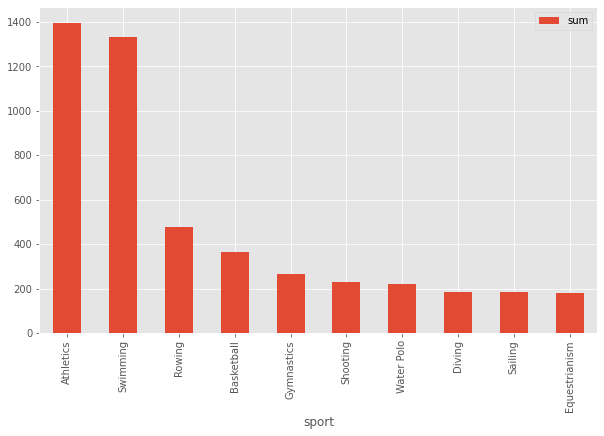

In [179]:
sql = """
SELECT sport, SUM(CASE medal
             WHEN 'Gold' THEN 1
             WHEN 'Silver' THEN 2
             WHEN 'Bronze' THEN 1
             ELSE 0
             END)
FROM olympics
WHERE noc = 'USA' and season = 'Summer'
GROUP BY sport
ORDER BY sum DESC
LIMIT 10;
"""
df = sqlio.read_sql_query(sql, conn)
df.plot('sport', 'sum', kind='bar', figsize=(10, 6))

In [ ]:
# Close communication with the database
conn.close()